## Introduction

Ads and PSAs are just some of the many ways companies promote their products and services. Its effectiveness to turn people to consume said products and services, however, is up in the air and left for questioning. This report aims to answer two of the following questions:

1. How successful are the following modes of dissemination in terms of endorsing products and services?

    a. Ads
    
    b. 1.2 PSAs
    
    
2. What are possible initiatives to further the effectiveness of said modes of dissemination?

## Importing Libraries and Dataset

For this report, we'll be using ``numpy``, ``pandas``, ``scipy.stats``, and ``matplotlib.pyplot`` to analyze our data. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

After inserting the necessary libraries, we can now create our dataframe (abbreviated to ``df`` in the code below). The dataset was provided by [Favio Vázquez](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) from Kaggle.

In [2]:
#df is the abbreviation of DataFrame

df = pd.read_csv('marketing_AB_clean.csv')

df

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


The data contains 588101 rows and six columns. According to Vázquez (2021), the following are the description of each of the columns: 
* ``user_id`` is a unique set of values to tag individual users who were exposed to either the Ads or PSA.
* ``test_group`` is whether the user has been exposed to either the Ads or PSA.
* ``converted`` explains whether the user has bought the product (True) or not (False).
* ``total_ads`` is the amount of ads seen by the user.
* ``most_ads_day`` is the day the user saw the most amount of ads.
* ``most_ads_hour`` is the time of day the person saw the most ads.

In [3]:
#To identify the two groups in the dataset

group_names = df.loc[:, 'test_group']
group_names_unique = group_names.unique()

group_names_unique

array(['ad', 'psa'], dtype=object)

## Sampling the Data

After cleaning the data, I applied Slovin's Formula to the study to get a sample from the dataset. Once computed, I sampled ``400`` users in total. 

In [4]:
#To remove duplicates from the dataset.

users = df['user_id'].value_counts(ascending=False)
multiple_users = users[users > 1].count()

print(f'There are {multiple_users} duplicates in this dataset.')

There are 0 duplicates in this dataset.


In [5]:
#Sample Size using Slovin's Formula

def n() :
    pop = df.loc[:,'test_group'].value_counts().sum()
    moe = 0.05 #margin of error
    moe2 = moe**2 #Margin Error raised to 2 as needed in the formula
    den = 1+(pop*moe2) #den is Short for denominator
    slovin = pop/den
    answer = round(slovin)
    print(f'We need {answer} responses as sample.')

n()

We need 400 responses as sample.


In [6]:
#To check if the sampled data is concatenated successfully

ads_sample = df[df['test_group'] == 'ad'].sample(n=200, random_state=1)
psa_sample = df[df['test_group'] == 'psa'].sample(n=200, random_state=1)

ab_test = pd.concat([ads_sample, psa_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

ab_test.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1525830,ad,False,5,Saturday,17
1,1513094,ad,False,59,Thursday,10
2,1475135,ad,False,6,Tuesday,13
3,1635331,ad,False,96,Tuesday,19
4,1499483,ad,True,119,Saturday,15


In [7]:
#To check if each group is represented

ab_test['test_group'].value_counts()

ad     200
psa    200
Name: test_group, dtype: int64

## Analyzing the Data

Cross-tabulation was performed to proceed with the Chi-Square test. The treatment is the perfecti fit to see the correlation between the test group and the effectiveness of their treatment. 

**Hypotheses**
<br>
$H_{0}$ = There is no correlation between the mode of dissemination and its effectiveness
<br>
$H_{a}$ = There is a correlation between the mode of dissemination and its effectiveness
<br>
$p-value = 0.05$

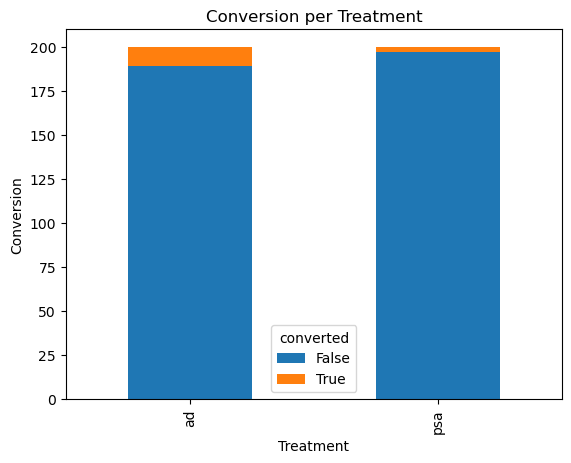

Chi2ContingencyResult(statistic=3.626943005181347, pvalue=0.05685115158291867, dof=1, expected_freq=array([[193.,   7.],
       [193.,   7.]]))


In [8]:
#Cross-Tabulation for A/B test
ctab_results = pd.crosstab(ab_test.test_group, ab_test.converted)

#Bar Chart
def results_bar_chart() :
    ctab_results.plot(kind='bar', stacked=True)
    plt.xlabel('Treatment')
    plt.ylabel('Conversion')
    plt.title('Conversion per Treatment')
    plt.show()

#Chi-Square Test
def results_chi_sqaure() :
    ctab_results_chi_square = stats.chi2_contingency(ctab_results)
    print(ctab_results_chi_square)
    
#To print results
def results():
    results_bar_chart()
    results_chi_sqaure()
    
results()

As findings show that the correlation has a $p-value$ of $0.056$, the null hypothesis is not rejected. However, this does not necessarily mean that the alternative hypothesis is true.

As it is apparent that either of the modes of dissemination have been effective, we may look at other ways that the modes of dissemination can be effective. 

## Initiatives

Upon further analysis, it can be seen that more people consumed the product or service in Monday and Tuesday. Two desicions can be made:
1. Ads should be posted around Mondays and Tuesdays
2. More posts can be posted towards the ends of the week (Thursdays-Saturdays)

converted     False  True 
most_ads_day              
Friday           69      1
Monday           58      4
Saturday         53      1
Sunday           60      2
Thursday         62      1
Tuesday          38      4
Wednesday        46      1
 


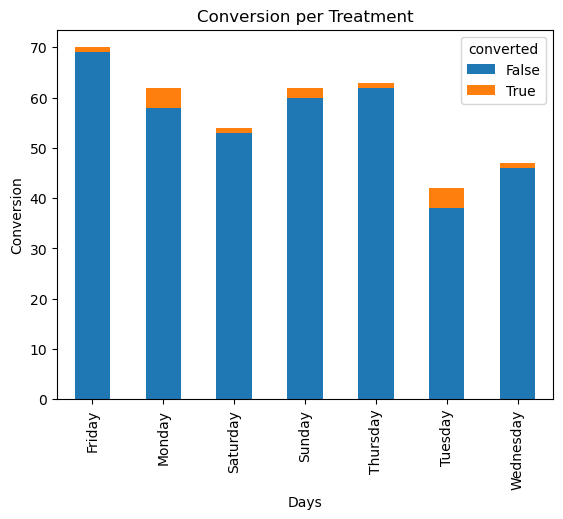

In [9]:
#To check days with the most converted

ctab_days = pd.crosstab(ab_test.most_ads_day, ab_test.converted)

def days_bar_chart() :
    print(ctab_days)
    print(" ")
    ctab_days.plot(kind='bar', stacked=True)
    plt.xlabel('Days')
    plt.ylabel('Conversion')
    plt.title("Conversion per Treatment")
    plt.show()
    
days_bar_chart()

In [10]:
#To seek peek hours where most ads appear.

def for_initiatives() : 
    ab_median = ab_test['most_ads_hour'].median()
    ab_max = mean = ab_test['most_ads_hour'].max()
    print(f'The median time with most ads is at {round(ab_median)}:00.')
    print(f'The latest time with most ads is at {round(ab_max)}:00.')
    
for_initiatives()

The median time with most ads is at 14:00.
The latest time with most ads is at 23:00.


It can also be seen that most ads pop up on non-peak hours (18:00-20:00). Hence, two decisions can be made:
1. Post during non-peak hours other than 14:00
2. Post ads before 23:00

Other suggestions for making data-driven decisions includes further gathering data about the content of Ads and PSAs, the type of product or service being endorsed, and the demographic of the users.

## Conclusion

As seen in the analysis of the data through A/B testing via Chi-square, neither Ads nor PSA may be effective in endorsing products and services. Peak hours and days may be a factor of its effectiveness. Further data can be scrapped to further analyze the results better.